In [20]:
# Importação de bibliotecas necessárias
import numpy as np  # Biblioteca para manipulação de arrays numéricos
import matplotlib.pyplot as plt  # Biblioteca para visualização de dados
import pandas as pd  # Biblioteca para manipulação e análise de dados
from keras.models import Sequential  # Modelo sequencial de redes neurais
from keras.layers import Dense, LSTM, Dropout  # Camadas para construção do modelo
from sklearn.preprocessing import MinMaxScaler  # Para normalização dos dados


##Link-Treinamento: https://drive.google.com/uc?id=1BgAUJFeJ1IW81wCcwQ-Hwk81-ZaIvZmZ
## Link-Teste: https://drive.google.com/uc?id=1MSRZB9MW_1bv9NPwD6cb7o9mUl1XoGJ2

In [21]:
# Leitura dos dados de treinamento e teste a partir de arquivos CSV
# Os links para os arquivos CSV estão fornecidos nos comentários abaixo
dataset_treino = pd.read_csv('C:\\Users\\user\\Desktop\\VsCode\\My\\Americanas\\AMER3.SA-Treinamento.csv')  # Dados de treinamento
dataset_teste = pd.read_csv('C:\\Users\\user\\Desktop\\VsCode\\My\\Americanas\\AMER3.SA-Teste.csv')  # Dados de teste

In [22]:
# Remoção de valores NaN (caso existam)
dataset_treino = dataset_treino.dropna()

In [27]:
# Extração apenas da coluna de preços de abertura dos dados de treinamento
treino_set = dataset_treino.iloc[:, 1:2].values

treino_set

array([[41.949505],
       [41.507931],
       [40.174377],
       ...,
       [ 9.38    ],
       [ 9.22    ],
       [ 9.72    ]])

In [28]:
# Normalização dos dados de treinamento entre 0 e 1
sc = MinMaxScaler(feature_range=(0, 1))
treino_set_scaled = sc.fit_transform(treino_set)

In [29]:
# Preparação dos dados de treinamento
X_treino = []  # Lista para armazenar as entradas do modelo
y_treino = []  # Lista para armazenar as saídas correspondentes


In [30]:
# Loop para criar janelas temporais de tamanho 20 para previsão
for i in range(20, len(treino_set_scaled)):
    X_treino.append(treino_set_scaled[i-20:i, 0])  # Entrada é um array de 20 dias anteriores
    y_treino.append(treino_set_scaled[i, 0])  # Saída é o próximo dia após os 20 dias anteriores

In [31]:
# Conversão das listas em arrays numpy
X_treino, y_treino = np.array(X_treino), np.array(y_treino)

In [32]:
# Reshape dos dados para o formato aceito pelo modelo LSTM (número de amostras, número de timesteps, número de features)
X_treino = np.reshape(X_treino, (X_treino.shape[0], X_treino.shape[1], 1))

In [33]:
# Inicialização do modelo LSTM
regressor = Sequential()

In [34]:
# Adição das camadas LSTM ao modelo com Dropout para evitar overfitting
regressor.add(LSTM(units=70, return_sequences=True, input_shape=(X_treino.shape[1], 1)))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=70, return_sequences=True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=70, return_sequences=True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=70))
regressor.add(Dropout(0.4))

In [35]:
# Adição da camada de saída com uma única unidade
regressor.add(Dense(units=1))

In [36]:
# Compilação do modelo com otimizador 'Nadam' e função de perda 'mean_squared_error'
regressor.compile(optimizer='Nadam', loss='mean_squared_error')

In [37]:
# Treinamento do modelo com os dados de treinamento
regressor.fit(X_treino, y_treino, epochs=100, batch_size=32)

Epoch 1/100
101/101 [==============================] - 10s 26ms/step - loss: 0.0053
Epoch 2/100
101/101 [==============================] - 3s 25ms/step - loss: 0.0024
Epoch 3/100
101/101 [==============================] - 3s 26ms/step - loss: 0.0023
Epoch 4/100
101/101 [==============================] - 3s 26ms/step - loss: 0.0021
Epoch 5/100
101/101 [==============================] - 3s 26ms/step - loss: 0.0020
Epoch 6/100
101/101 [==============================] - 3s 26ms/step - loss: 0.0016
Epoch 7/100
101/101 [==============================] - 3s 26ms/step - loss: 0.0019
Epoch 8/100
101/101 [==============================] - 3s 27ms/step - loss: 0.0015
Epoch 9/100
101/101 [==============================] - 3s 26ms/step - loss: 0.0014
Epoch 10/100
101/101 [==============================] - 3s 26ms/step - loss: 0.0013
Epoch 11/100
101/101 [==============================] - 3s 26ms/step - loss: 0.0013
Epoch 12/100
101/101 [==============================] - 3s 26ms/step - loss: 0.0013


In [38]:
# Preparação dos dados de teste
real_preco_acao = dataset_teste.iloc[:, 1:2].values

In [39]:
# Concatenação dos dados de treinamento e teste para garantir continuidade
dataset_total = pd.concat((dataset_treino['Open'], dataset_teste['Open']), axis=0)

In [40]:
# Extração dos últimos 20 dias de preços para previsão
inputs = dataset_total[len(dataset_total) - len(dataset_teste) - 20:].values
inputs = inputs.reshape(-1, 1)

In [41]:
# Normalização dos dados de entrada
inputs = sc.transform(inputs)

In [42]:
# Preparação dos dados de teste em formato similar ao de treinamento
X_teste = []

for i in range(20, 40):
    X_teste.append(inputs[i-20:i, 0])

X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [43]:
# Previsão dos preços de ação com o modelo treinado
preco_acao_previsto = regressor.predict(X_teste)

1/1 [==============================] - 1s 1s/step


In [44]:
# Desnormalização dos preços previstos para obter valores em escala original
preco_acao_previsto = sc.inverse_transform(preco_acao_previsto)

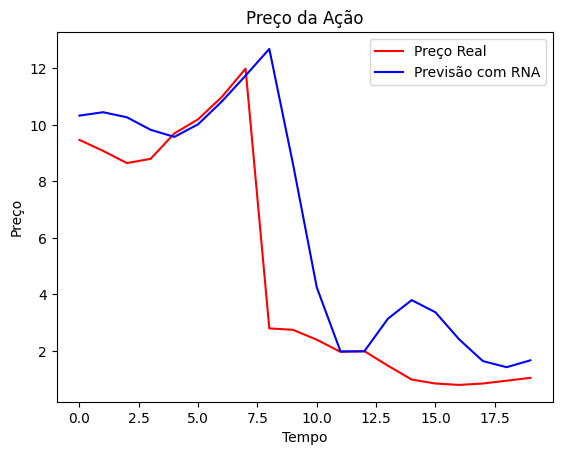

In [45]:
# Visualização dos resultados
plt.plot(real_preco_acao, color='red', label='Preço Real')
plt.plot(preco_acao_previsto, color='blue', label='Previsão com RNA')
plt.title('Preço da Ação')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()